# Credit Card Approval Prediction

## Import Package yang Dibutuhkan

In [220]:
import numpy as np
import pandas as pd
from scipy import stats
from zipfile import ZipFile
import seaborn as sns
# !pip install imbalanced_learn
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve, auc,classification_report, accuracy_score

## Load Dataset

In [6]:
zip_dir = "./Data/archive.zip"
zip_ref = ZipFile(zip_dir, 'r')
zip_ref
zip_ref.extractall()
zip_ref.close()

<zipfile.ZipFile filename='./Data/archive.zip' mode='r'>

In [49]:
app_df = pd.read_csv('./Data/application_record.csv')
credit_df = pd.read_csv('./Data/credit_record.csv')

In [50]:
app_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


## EDA ( Exploratory Data Analysis )

### Data Understanding

In [51]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [52]:
app_df.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [53]:
app_df.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [54]:
# Checking Non-Numerical Columns
cat_columns = app_df.columns[(app_df.dtypes =='object').values].tolist()
cat_columns

['CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE']

In [55]:
# Checking Numerical Columns
app_df.columns[(app_df.dtypes !='object').values].tolist()

['ID',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'FLAG_MOBIL',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS']

In [56]:
# Checking unique values from Categorical Columns

for i in app_df.columns[(app_df.dtypes =='object').values].tolist():
    print(i,'\n')
    print(app_df[i].value_counts())
    print('-----------------------------------------------')

CODE_GENDER 

F    294440
M    144117
Name: CODE_GENDER, dtype: int64
-----------------------------------------------
FLAG_OWN_CAR 

N    275459
Y    163098
Name: FLAG_OWN_CAR, dtype: int64
-----------------------------------------------
FLAG_OWN_REALTY 

Y    304074
N    134483
Name: FLAG_OWN_REALTY, dtype: int64
-----------------------------------------------
NAME_INCOME_TYPE 

Working                 226104
Commercial associate    100757
Pensioner                75493
State servant            36186
Student                     17
Name: NAME_INCOME_TYPE, dtype: int64
-----------------------------------------------
NAME_EDUCATION_TYPE 

Secondary / secondary special    301821
Higher education                 117522
Incomplete higher                 14851
Lower secondary                    4051
Academic degree                     312
Name: NAME_EDUCATION_TYPE, dtype: int64
-----------------------------------------------
NAME_FAMILY_STATUS 

Married                 299828
Single / not ma

In [57]:
# Checking unique values from Numerical Columns
app_df['CNT_CHILDREN'].value_counts()

0     304071
1      88527
2      39884
3       5430
4        486
5        133
7          9
9          5
6          4
12         4
14         3
19         1
Name: CNT_CHILDREN, dtype: int64

In [58]:
# Checking Min , Max values from 'DAYS_BIRTH' column
print('Min DAYS_BIRTH :', app_df['DAYS_BIRTH'].min(),'\nMax DAYS_BIRTH :', app_df['DAYS_BIRTH'].max())

Min DAYS_BIRTH : -25201 
Max DAYS_BIRTH : -7489


In [59]:
# Converting 'DAYS_BIRTH' values from Day to Years
app_df['DAYS_BIRTH'] = round(app_df['DAYS_BIRTH']/-365,0)
app_df.rename(columns={'DAYS_BIRTH':'AGE_YEARS'}, inplace=True)

In [60]:
# Checking unique values greater than 0
app_df[app_df['DAYS_EMPLOYED']>0]['DAYS_EMPLOYED'].unique()

array([365243], dtype=int64)

In [61]:
# As mentioned in document, if 'DAYS_EMPLOYED' is positive no, it means person currently unemployed, hence replacing it with 0
app_df['DAYS_EMPLOYED'].replace(365243, 0, inplace=True)

In [62]:
# Converting 'DAYS_EMPLOYED' values from Day to Years
app_df['DAYS_EMPLOYED'] = abs(round(app_df['DAYS_EMPLOYED']/-365,0))
app_df.rename(columns={'DAYS_EMPLOYED':'YEARS_EMPLOYED'}, inplace=True)  

In [63]:
app_df['FLAG_MOBIL'].value_counts()

1    438557
Name: FLAG_MOBIL, dtype: int64

In [64]:
app_df['FLAG_WORK_PHONE'].value_counts()

0    348156
1     90401
Name: FLAG_WORK_PHONE, dtype: int64

In [65]:
app_df['FLAG_PHONE'].value_counts()

0    312353
1    126204
Name: FLAG_PHONE, dtype: int64

In [66]:
app_df['FLAG_EMAIL'].value_counts()

0    391102
1     47455
Name: FLAG_EMAIL, dtype: int64

In [67]:
app_df['CNT_FAM_MEMBERS'].value_counts()

2.0     233891
1.0      84492
3.0      77128
4.0      37356
5.0       5081
6.0        459
7.0        124
9.0          9
11.0         5
8.0          4
14.0         4
15.0         3
20.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [68]:
app_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE_YEARS,YEARS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,59.0,3.0,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1,0,1,1,Sales staff,1.0


### Data Cleaning

#### Handling Missing Value

In [69]:
app_df.drop('OCCUPATION_TYPE', axis=1, inplace=True)

In [70]:
# As all the values in column are 1, hence dropping column
app_df.drop('FLAG_MOBIL', axis=1, inplace=True)

In [71]:
# This column only contains 0 & 1 values for Mobile no submitted, hence dropping column
app_df.drop('FLAG_WORK_PHONE', axis=1, inplace=True)

In [72]:
# This column only contains 0 & 1 values for Phone no submitted, hence dropping column
app_df.drop('FLAG_PHONE', axis=1, inplace=True)

In [73]:
# This column only contains 0 & 1 values for Email submitted, hence dropping column
app_df.drop('FLAG_EMAIL', axis=1, inplace=True)

#### Handling Outliers

In [74]:
# Checking Numerical Columns
app_df.columns[(app_df.dtypes !='object').values].tolist()

['ID',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AGE_YEARS',
 'YEARS_EMPLOYED',
 'CNT_FAM_MEMBERS']

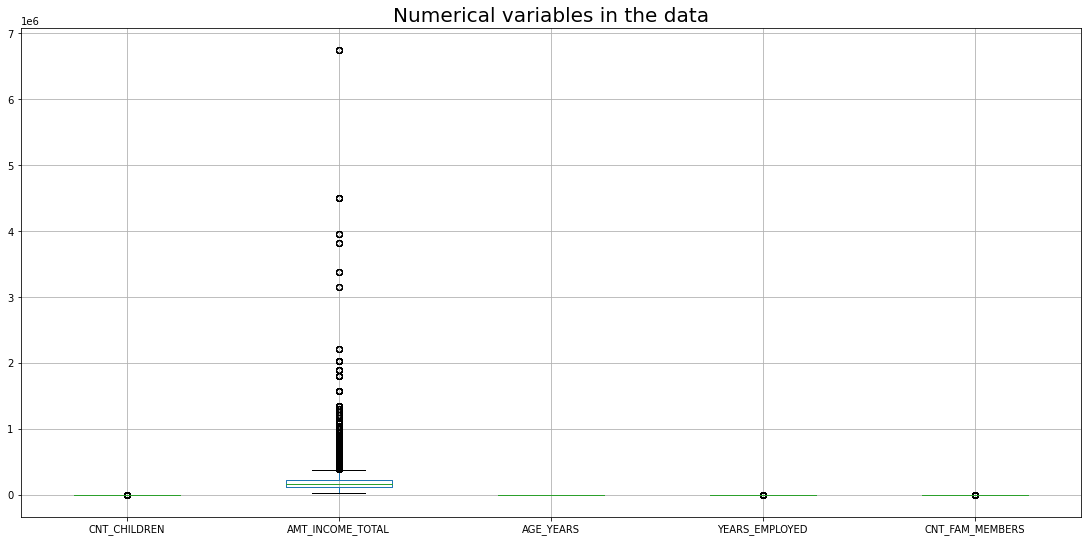

In [75]:
num_cols = ['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AGE_YEARS',
 'YEARS_EMPLOYED',
 'CNT_FAM_MEMBERS']

plt.figure(figsize=(19,9))
app_df[num_cols].boxplot()
plt.title("Numerical variables in the data", fontsize=20)
plt.show()

In [76]:
def detect_outlier(data_1):
    outliers=[]
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [154]:
AMT_outliers = detect_outlier(app_df['AMT_INCOME_TOTAL'])
CNTCh_outliers = detect_outlier(app_df['CNT_CHILDREN'])
YE_outliers = detect_outlier(app_df['YEARS_EMPLOYED'])
CFM_outliers = detect_outlier(app_df['CNT_FAM_MEMBERS'])
print("outliers")
print(f"AMT_INCOME_TOTAL : {len(AMT_outliers)}")
print(f"CNT_CHILDREN: {len(CNTCh_outliers)}")
print(f"YEARS_EMPLOYED : {len(YE_outliers)}")
print(f"CNT_FAM_MEMBERS : {len(CFM_outliers)}")

outliers
AMT_INCOME_TOTAL : 5276
CNT_CHILDREN: 6075
YEARS_EMPLOYED : 9531
CNT_FAM_MEMBERS : 5690


In [163]:
def remove_outlier(data):
    z = np.abs(stats.zscore(data))
    threshold = 3
    Q1 = np.percentile(data, 25,
                   interpolation = 'midpoint')
    Q3 = np.percentile(data, 75,
                   interpolation = 'midpoint')
    IQR = Q3 - Q1
    upper = data >= (Q3+1.5*IQR)
     # Below Lower bound
    lower = data <= (Q1-1.5*IQR)
    return data.index[upper]

In [164]:
application_df = app_df.copy()
application_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE_YEARS,YEARS_EMPLOYED,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,59.0,3.0,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1.0


In [165]:
application_df.drop(remove_outlier(application_df["CNT_CHILDREN"]), inplace=True)
application_df.drop(remove_outlier(application_df["AMT_INCOME_TOTAL"]), inplace=True)
application_df.drop(remove_outlier(application_df["YEARS_EMPLOYED"]), inplace=True)
application_df.drop(remove_outlier(application_df["CNT_FAM_MEMBERS"]), inplace=True)

In [166]:
application_df["AMT_INCOME_TOTAL"].value_counts()

135000.00    43525
157500.00    36871
180000.00    35367
112500.00    34372
225000.00    31726
             ...  
165735.00        1
109603.35        1
133461.00        1
129060.00        1
167692.50        1
Name: AMT_INCOME_TOTAL, Length: 725, dtype: int64

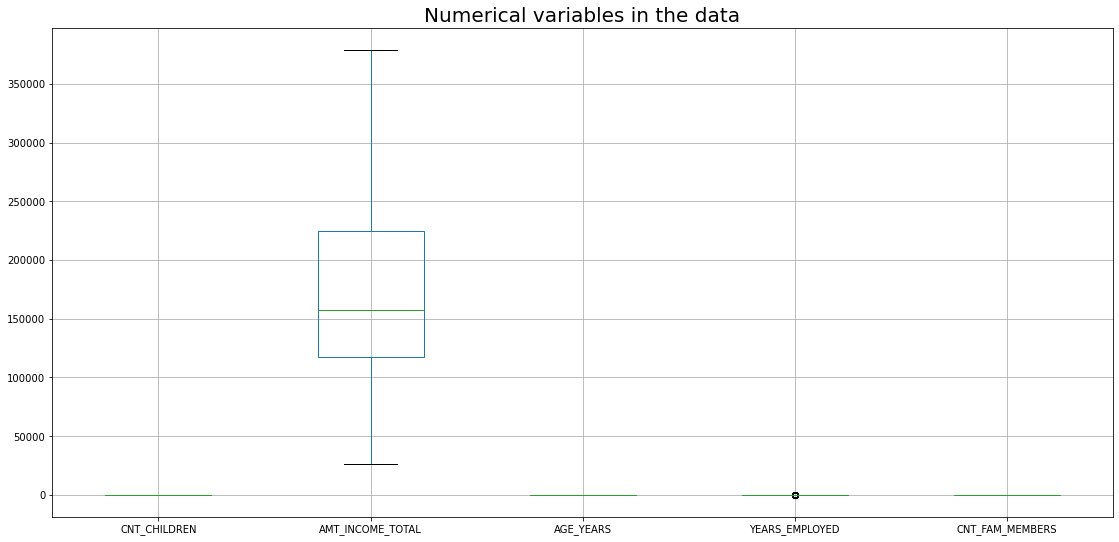

In [167]:
num_cols = ['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AGE_YEARS',
 'YEARS_EMPLOYED',
 'CNT_FAM_MEMBERS']

plt.figure(figsize=(19,9))
application_df[num_cols].boxplot()
plt.title("Numerical variables in the data", fontsize=20)
plt.show()

In [168]:
application_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE_YEARS,YEARS_EMPLOYED,CNT_FAM_MEMBERS
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,59.0,3.0,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1.0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1.0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1.0


In [169]:
AMT_outliers = detect_outlier(application_df['AMT_INCOME_TOTAL'])
CNTCh_outliers = detect_outlier(application_df['CNT_CHILDREN'])
YE_outliers = detect_outlier(application_df['YEARS_EMPLOYED'])
CFM_outliers = detect_outlier(application_df['CNT_FAM_MEMBERS'])
print("outliers")
print(f"AMT_INCOME_TOTAL : {len(AMT_outliers)}")
print(f"CNT_CHILDREN: {len(CNTCh_outliers)}")
print(f"YEARS_EMPLOYED : {len(YE_outliers)}")
print(f"CNT_FAM_MEMBERS : {len(CFM_outliers)}")

outliers
AMT_INCOME_TOTAL : 0
CNT_CHILDREN: 0
YEARS_EMPLOYED : 0
CNT_FAM_MEMBERS : 0


In [170]:
application_df.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
AGE_YEARS              0
YEARS_EMPLOYED         0
CNT_FAM_MEMBERS        0
dtype: int64

#### Data Transforming

Transforming Data credit_record.csv

In [171]:
credit_df.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [172]:
credit_df['STATUS'].value_counts()

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

In [174]:
# categorizing 'STATUS' column to binary classification   0 : Good Client and 1 : bad client
credit_df['STATUS'].replace(['C', 'X'],0, inplace=True)
credit_df['STATUS'].replace(['2','3','4','5'],1, inplace=True)
credit_df['STATUS'] = credit_df['STATUS'].astype('int')

In [175]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype
---  ------          --------------    -----
 0   ID              1048575 non-null  int64
 1   MONTHS_BALANCE  1048575 non-null  int64
 2   STATUS          1048575 non-null  int32
dtypes: int32(1), int64(2)
memory usage: 20.0 MB


In [176]:
credit_df['STATUS'].value_counts(normalize=True)*100

0    98.646353
1     1.353647
Name: STATUS, dtype: float64

In [177]:
credit_df_trans = credit_df.groupby('ID').agg(max).reset_index()

In [178]:
credit_df_trans.drop('MONTHS_BALANCE', axis=1, inplace=True)
credit_df_trans.head()

,ID,STATUS
0,5001711,0
1,5001712,0
2,5001713,0
3,5001714,0
4,5001715,0


In [179]:
credit_df_trans['STATUS'].value_counts(normalize=True)*100

0    88.365771
1    11.634229
Name: STATUS, dtype: float64

##### Merging Dataframe

In [180]:
# merging the two datasets based on 'ID'
final_df = pd.merge(app_df, credit_df_trans, on='ID', how='inner')
final_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE_YEARS,YEARS_EMPLOYED,CNT_FAM_MEMBERS,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,2.0,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,2.0,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,59.0,3.0,2.0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1.0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1.0,0


In [181]:
final_df.shape

(36457, 14)

In [182]:
# dropping 'ID' column as it is having only unique values (not required for ML Model)
final_df.drop('ID', axis=1, inplace=True)

In [183]:
# Dropping duplicate records
final_df = final_df.drop_duplicates()
final_df.reset_index(drop=True ,inplace=True)

In [184]:
final_df.shape

(11096, 13)

In [185]:
final_df.isnull().sum()

CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
AGE_YEARS              0
YEARS_EMPLOYED         0
CNT_FAM_MEMBERS        0
STATUS                 0
dtype: int64

In [186]:
final_df['STATUS'].value_counts(normalize=True)*100

0    78.505768
1    21.494232
Name: STATUS, dtype: float64

In [207]:
#Converting all Non-Numerical Columns to Numerical
from sklearn.preprocessing import LabelEncoder

for col in cat_columns:
        globals()['LE_{}'.format(col)] = LabelEncoder()
        final_df[col] = globals()['LE_{}'.format(col)].fit_transform(final_df[col])
final_df.head()  

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE_YEARS,YEARS_EMPLOYED,CNT_FAM_MEMBERS,STATUS
0,1,1,1,0,427500.0,4,1,0,4,33.0,12.0,2.0,1
1,1,1,1,0,112500.0,4,4,1,1,59.0,3.0,2.0,0
2,0,0,1,0,270000.0,0,4,3,1,52.0,8.0,1.0,0
3,0,0,1,0,283500.0,1,1,2,1,62.0,0.0,1.0,0
4,1,1,1,0,270000.0,4,1,1,1,46.0,2.0,2.0,0


#### Data Visualization

In [187]:
final_df.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE_YEARS,YEARS_EMPLOYED,CNT_FAM_MEMBERS,STATUS
0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,2.0,1
1,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,59.0,3.0,2.0,0
2,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1.0,0
3,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,62.0,0.0,1.0,0
4,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,46.0,2.0,2.0,0


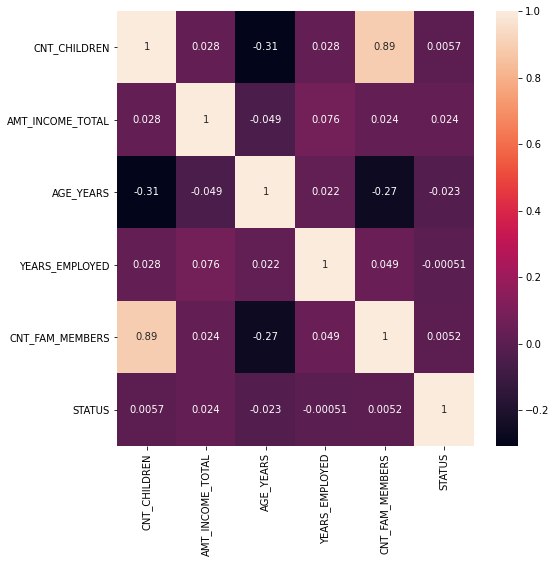

In [190]:
# This graph shows that, there is no column (Feature) which is highly co-related with 'Status'
plt.figure(figsize = (8,8))
sns.heatmap(final_df.corr(), annot=True)
plt.show()

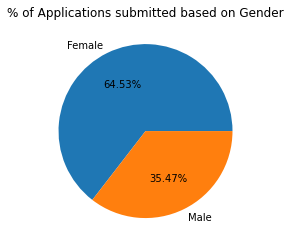

In [191]:
# This graph shows that, majority of application are submitted by Female's
plt.pie(final_df['CODE_GENDER'].value_counts(), labels=['Female', 'Male'], autopct='%1.2f%%')
plt.title('% of Applications submitted based on Gender')
plt.show()

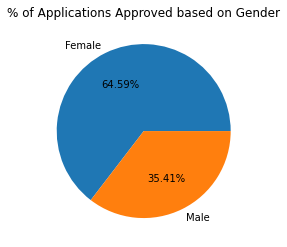

In [192]:
# This graph shows that, majority of application are approved for Female's
plt.pie(final_df[final_df['STATUS']==0]['CODE_GENDER'].value_counts(), labels=['Female', 'Male'], autopct='%1.2f%%')
plt.title('% of Applications Approved based on Gender')
plt.show()

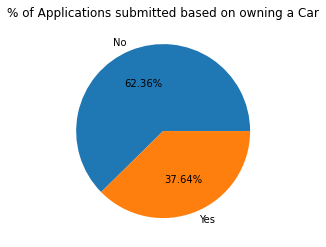

In [193]:
# This graph shows that, majority of applicatant's dont own a car
plt.pie(final_df['FLAG_OWN_CAR'].value_counts(), labels=['No', 'Yes'], autopct='%1.2f%%')
plt.title('% of Applications submitted based on owning a Car')
plt.show()

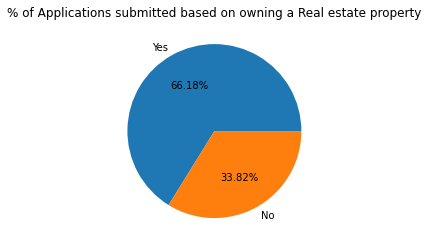

In [194]:
# This graph shows that, majority of applicatant's own a Real Estate property / House
plt.pie(final_df['FLAG_OWN_REALTY'].value_counts(), labels=['Yes','No'], autopct='%1.2f%%')
plt.title('% of Applications submitted based on owning a Real estate property')
plt.show()

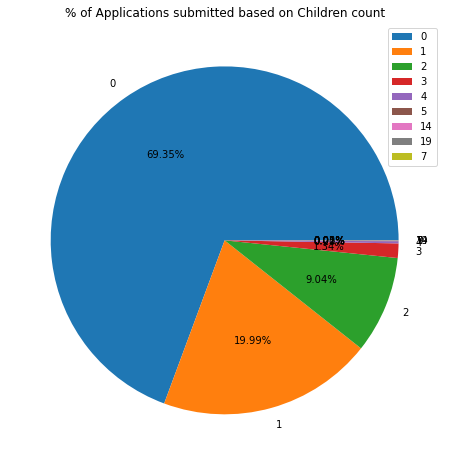

In [195]:
# This graph shows that, majority of applicatant's don't have any children
plt.figure(figsize = (8,8))
plt.pie(final_df['CNT_CHILDREN'].value_counts(), labels=final_df['CNT_CHILDREN'].value_counts().index, autopct='%1.2f%%')
plt.title('% of Applications submitted based on Children count')
plt.legend()
plt.show()

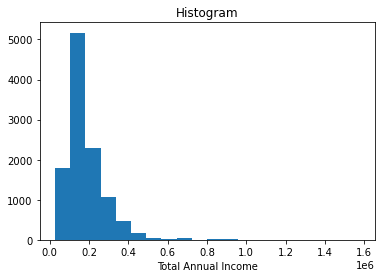

In [196]:
# This graph shows that, majority of applicatant's income lies between 1 to 3 lakh
plt.hist(final_df['AMT_INCOME_TOTAL'], bins=20)
plt.xlabel('Total Annual Income')
plt.title('Histogram')
plt.show()

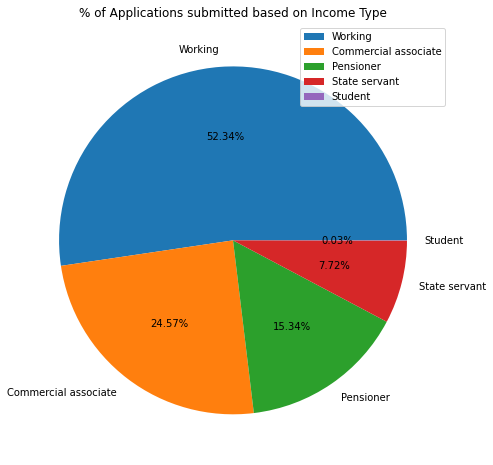

In [197]:
# This graph shows that, majority of applicatant's are working professional
plt.figure(figsize = (8,8))
plt.pie(final_df['NAME_INCOME_TYPE'].value_counts(), labels=final_df['NAME_INCOME_TYPE'].value_counts().index, autopct='%1.2f%%')
plt.title('% of Applications submitted based on Income Type')
plt.legend()
plt.show()

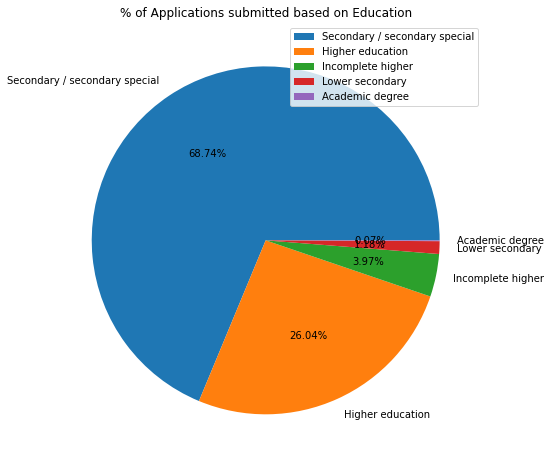

In [198]:
# This graph shows that, majority of applicatant's completed the Secondary Education
plt.figure(figsize=(8,8))
plt.pie(final_df['NAME_EDUCATION_TYPE'].value_counts(), labels=final_df['NAME_EDUCATION_TYPE'].value_counts().index, autopct='%1.2f%%')
plt.title('% of Applications submitted based on Education')
plt.legend()
plt.show()

C:\Users\faisa\anaconda3\envs\mldl\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


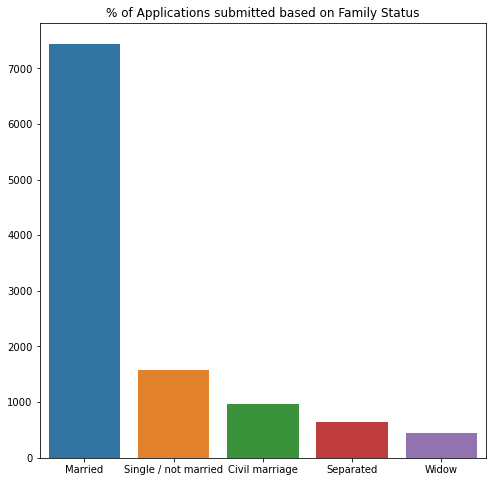

In [199]:
# This graph shows that, majority of applicatant's are married
plt.figure(figsize=(8,8))
sns.barplot(final_df['NAME_FAMILY_STATUS'].value_counts().index, final_df['NAME_FAMILY_STATUS'].value_counts().values)
plt.title('% of Applications submitted based on Family Status')
plt.show()

C:\Users\faisa\anaconda3\envs\mldl\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


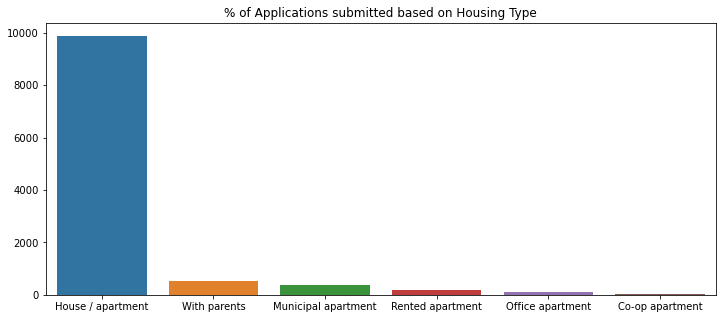

In [200]:
# This graph shows that, majority of applicatant's lives in House / Apartment
plt.figure(figsize=(12,5))
sns.barplot(final_df['NAME_HOUSING_TYPE'].value_counts().index, final_df['NAME_HOUSING_TYPE'].value_counts().values)
plt.title('% of Applications submitted based on Housing Type')
plt.show()

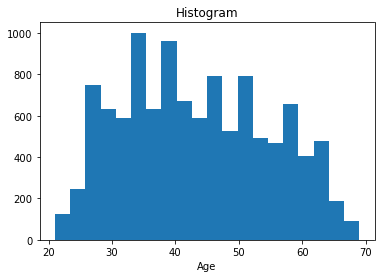

In [201]:
# This graph shows that, majority of applicatant's are 25 to 65 years old
plt.hist(final_df['AGE_YEARS'], bins=20)
plt.xlabel('Age')
plt.title('Histogram')
plt.show()

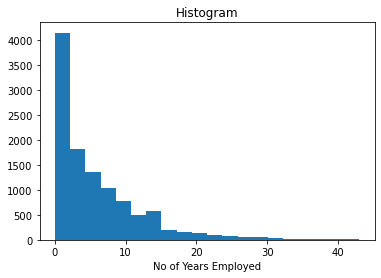

In [202]:
# This graph shows that, majority of applicatant's are Employed for 0 to 7 years
plt.hist(final_df['YEARS_EMPLOYED'], bins=20)
plt.xlabel('No of Years Employed')
plt.title('Histogram')
plt.show()

C:\Users\faisa\anaconda3\envs\mldl\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


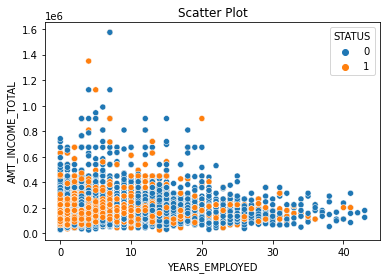

In [203]:
# This graph shows that, majority of applications are rejected if Total income & years of Employment is less
sns.scatterplot(final_df['YEARS_EMPLOYED'], final_df['AMT_INCOME_TOTAL'], hue=final_df['STATUS'])
plt.title('Scatter Plot')
plt.show()

### Data Preprocessing

In [204]:
final_df.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE_YEARS,YEARS_EMPLOYED,CNT_FAM_MEMBERS,STATUS
0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33.0,12.0,2.0,1
1,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,59.0,3.0,2.0,0
2,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,8.0,1.0,0
3,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,62.0,0.0,1.0,0
4,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,46.0,2.0,2.0,0


#### Separated Data to Feature and Label

In [206]:
cat_columns = final_df.columns[(final_df.dtypes =='object').values].tolist()
cat_columns

['CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE']

In [208]:
for col in cat_columns:
    print(col , "  : ", globals()['LE_{}'.format(col)].classes_)

CODE_GENDER   :  ['F' 'M']
FLAG_OWN_CAR   :  ['N' 'Y']
FLAG_OWN_REALTY   :  ['N' 'Y']
NAME_INCOME_TYPE   :  ['Commercial associate' 'Pensioner' 'State servant' 'Student' 'Working']
NAME_EDUCATION_TYPE   :  ['Academic degree' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Secondary / secondary special']
NAME_FAMILY_STATUS   :  ['Civil marriage' 'Married' 'Separated' 'Single / not married' 'Widow']
NAME_HOUSING_TYPE   :  ['Co-op apartment' 'House / apartment' 'Municipal apartment'
 'Office apartment' 'Rented apartment' 'With parents']


In [209]:
final_df.corr()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE_YEARS,YEARS_EMPLOYED,CNT_FAM_MEMBERS,STATUS
CODE_GENDER,1.000000,0.348258,-0.052846,0.051202,0.194073,0.073146,0.013074,-0.075379,0.052509,-0.157520,-0.045253,0.077519,0.002287
FLAG_OWN_CAR,0.348258,1.000000,-0.000610,0.084779,0.218197,0.029586,-0.086370,-0.124633,-0.011162,-0.106839,0.007727,0.135368,-0.003441
FLAG_OWN_REALTY,-0.052846,-0.000610,1.000000,0.004486,0.035862,-0.034453,0.003750,-0.010842,-0.178554,0.121482,-0.009743,0.011068,-0.023335
CNT_CHILDREN,0.051202,0.084779,0.004486,1.000000,0.028182,0.088801,-0.018257,-0.150328,0.006105,-0.308425,0.027988,0.893466,0.005660
AMT_INCOME_TOTAL,0.194073,0.218197,0.035862,0.028182,1.000000,-0.085819,-0.231292,-0.011367,-0.011896,-0.049158,0.075775,0.024369,0.024117
NAME_INCOME_TYPE,0.073146,0.029586,-0.034453,0.088801,-0.085819,1.000000,0.078123,-0.029218,0.035912,-0.192125,0.160882,0.082886,-0.002845
NAME_EDUCATION_TYPE,0.013074,-0.086370,0.003750,-0.018257,-0.231292,0.078123,1.000000,0.003987,-0.032279,0.146140,-0.015747,-0.015563,-0.007191
NAME_FAMILY_STATUS,-0.075379,-0.124633,-0.010842,-0.150328,-0.011367,-0.029218,0.003987,1.000000,0.039331,0.076252,-0.053509,-0.527135,0.003678
NAME_HOUSING_TYPE,0.052509,-0.011162,-0.178554,0.006105,-0.011896,0.035912,-0.032279,0.039331,1.000000,-0.219183,-0.042634,-0.024094,0.016737
AGE_YEARS,-0.157520,-0.106839,0.121482,-0.308425,-0.049158,-0.192125,0.146140,0.076252,-0.219183,1.000000,0.021876,-0.267035,-0.023447


In [210]:
features = final_df.drop(['STATUS'], axis=1)
label = final_df['STATUS']

In [211]:
features.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE_YEARS,YEARS_EMPLOYED,CNT_FAM_MEMBERS
0,1,1,1,0,427500.0,4,1,0,4,33.0,12.0,2.0
1,1,1,1,0,112500.0,4,4,1,1,59.0,3.0,2.0
2,0,0,1,0,270000.0,0,4,3,1,52.0,8.0,1.0
3,0,0,1,0,283500.0,1,1,2,1,62.0,0.0,1.0
4,1,1,1,0,270000.0,4,1,1,1,46.0,2.0,2.0


In [212]:
label.head()

0    1
1    0
2    0
3    0
4    0
Name: STATUS, dtype: int32

#### Check Imbalanced Data

In [213]:
oversample = SMOTE(k_neighbors=5)
X_smote, Y_smote = oversample.fit_resample(features, label)

In [216]:
counter = Counter(Y_smote)
print(counter)

Counter({1: 8711, 0: 8711})


#### Normalization Data

In [218]:
scaler_minmax =  MinMaxScaler()
# transform data
X_scaled = scaler_minmax.fit_transform(X_smote)
print(X_scaled)

[[1.         1.         1.         ... 0.25       0.27906977 0.05263158]
 [1.         1.         1.         ... 0.79166667 0.06976744 0.05263158]
 [0.         0.         1.         ... 0.64583333 0.18604651 0.        ]
 ...
 [0.         0.         0.         ... 0.37057125 0.42281697 0.07335316]
 [0.         0.         1.         ... 0.46499523 0.30232558 0.01683005]
 [0.         0.         1.         ... 0.4275966  0.30232558 0.07765068]]


#### Split Data to Train and Test

In [221]:
X_train,X_test,Y_train,Y_test = train_test_split(X_scaled, Y_smote, test_size = 0.2, random_state = 42)

In [222]:
print(X_train.shape)
print(X_test.shape)

(13937, 12)
(3485, 12)


## Modeling

In [223]:
model = LogisticRegression(solver='liblinear', random_state=4)

In [224]:
model.fit(X_train, Y_train)

LogisticRegression(random_state=4, solver='liblinear')

### Evaluating Model

In [226]:
y_pred = model.predict(X_test)

In [229]:
print('Logistic Model Accuracy : ', model.score(X_test, Y_test)*100, '%')

Logistic Model Accuracy :  63.90243902439025 %


In [232]:
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[1113  687]
 [ 571 1114]]
              precision    recall  f1-score   support

           0       0.66      0.62      0.64      1800
           1       0.62      0.66      0.64      1685

    accuracy                           0.64      3485
   macro avg       0.64      0.64      0.64      3485
weighted avg       0.64      0.64      0.64      3485



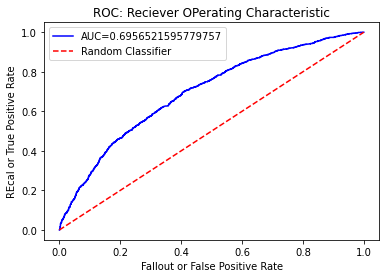

In [234]:
prob_estimates = model.predict_proba(X_test)

fpr, tpr, threshold = roc_curve(Y_test, prob_estimates[:,1])
nilai_auc = auc(fpr,tpr)

plt.plot(fpr, tpr, 'b', label=f'AUC={nilai_auc}')
plt.plot([0,1], [0,1], 'r--', label='Random Classifier')

plt.title('ROC: Reciever OPerating Characteristic')
plt.xlabel('Fallout or False Positive Rate')
plt.ylabel('REcal or True Positive Rate')
plt.legend()
plt.show()